### Evaluación del Modelo Linear Regression en el Dataset de Housing


## 1. Introducción

En este proyecto se realizará un análisis detallado de **Regresión Lineal** aplicada al dataset de Housing.

El objetivo principal es modelar la relación entre las características socioeconómicas y estructurales de los vecindarios y el valor medio de las viviendas (`MEDV`).

En esta primera fase se abordarán los siguientes puntos:

- Carga y exploración inicial del dataset.
- Análisis de valores nulos y preprocesamiento básico.
- Análisis exploratorio de datos (visualización de correlaciones y outliers).
- Ajuste de un modelo de Regresión Lineal.
- Evaluación de la calidad del ajuste mediante métricas estadísticas.
- Interpretación de los coeficientes del modelo.

Este análisis se centrará únicamente en el modelo de **Regresión Lineal clásico**.  
La comparación con otros modelos y la aplicación de técnicas de **validación cruzada** se realizará en un proyecto separado.


## 2. Carga y Exploración de Datos

En esta sección se cargará el dataset de Housing y se realizará una inspección general de su estructura y calidad.


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo general
sns.set(style="whitegrid")

# Cargar dataset
ruta = r'C:\Users\abuen\OneDrive\00 - BUSINNESS INTELLIGENCE\MODULO_2\DATASET\HousingData.csv'
housing_df = pd.read_csv(ruta)

# Mostrar las primeras filas para inspección
housing_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [2]:
# Información general
housing_df.info()

# Estadísticas básicas
housing_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
# Cantidad de valores nulos por columna
housing_df.isnull().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

## 3. Análisis Exploratorio de Correlaciones

### Correlaciones Reales entre Variables del Dataset Housing
Se analiza la relación de variables relevantes (`RM`, `LSTAT`, `PTRATIO`, `INDUS`, `TAX`) respecto a `MEDV`.



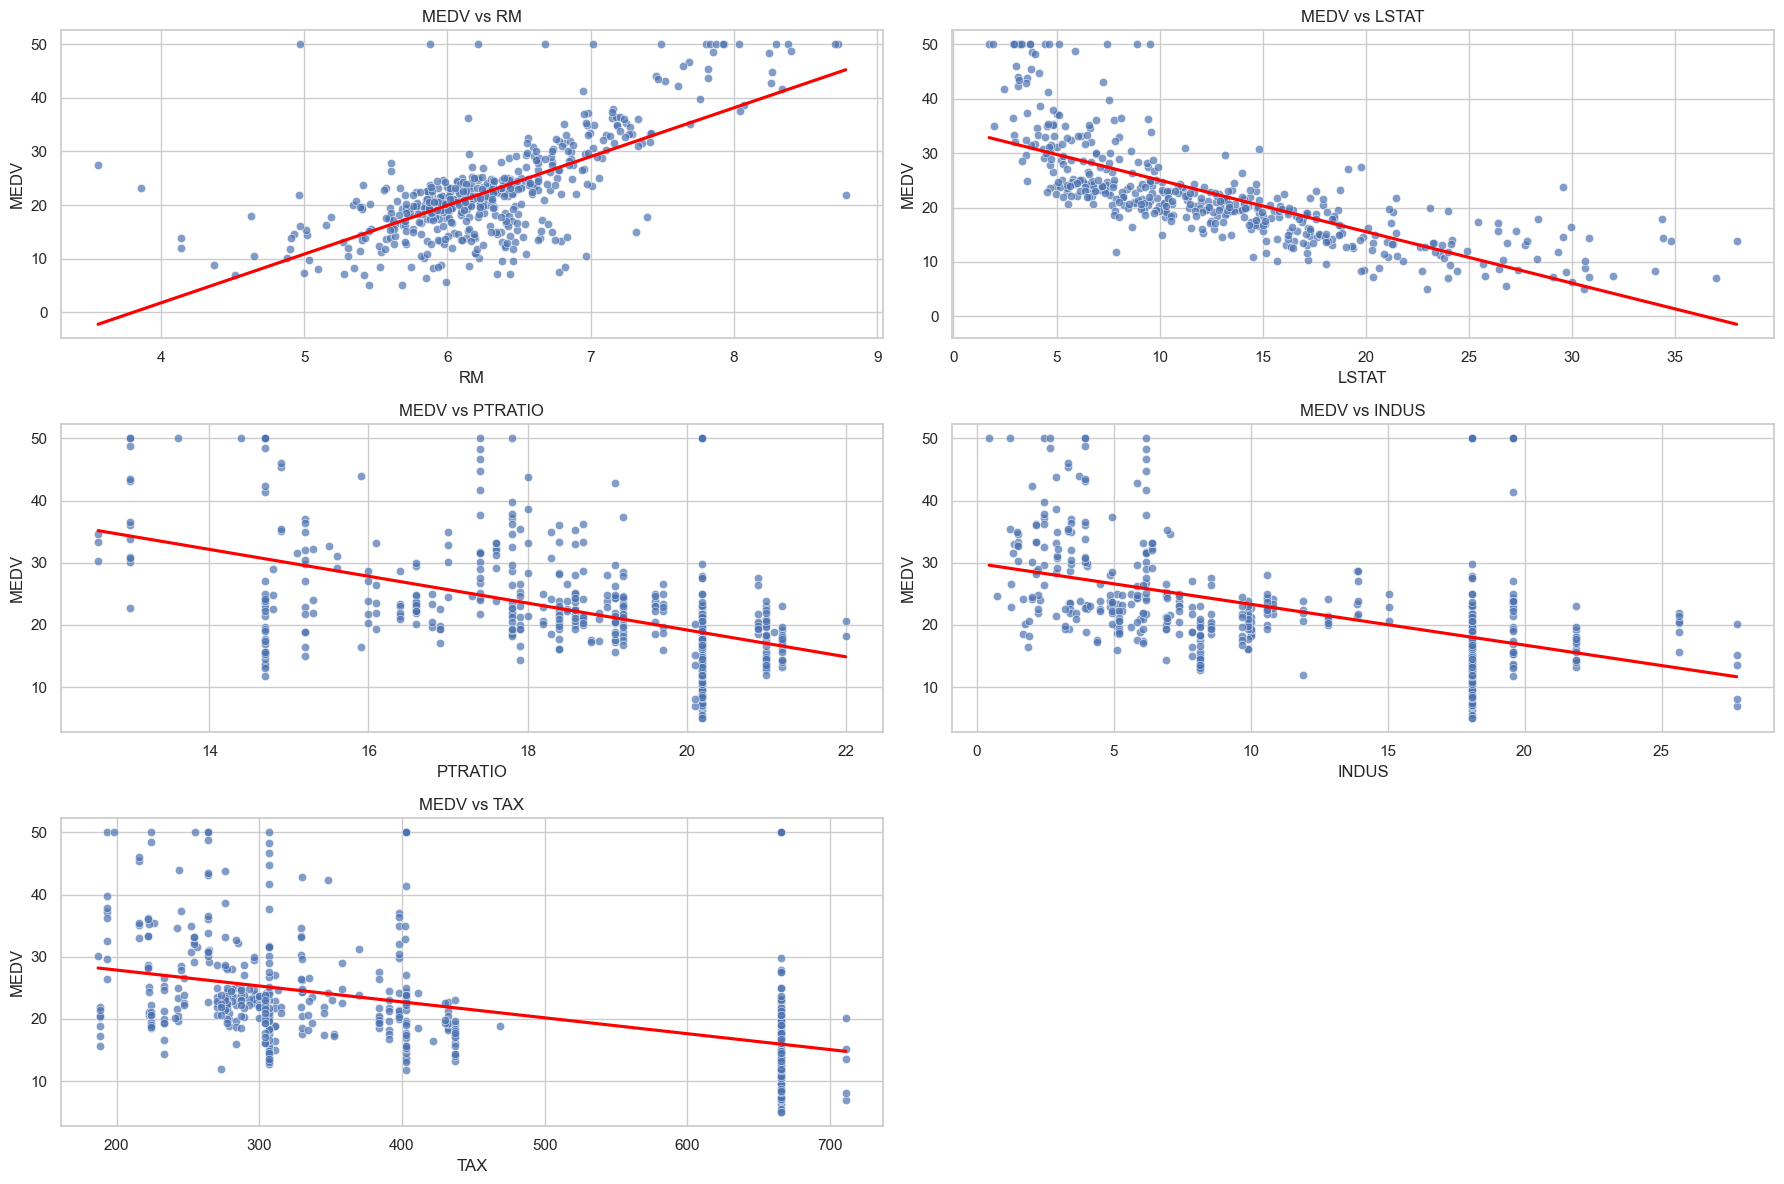

In [5]:
# Variables seleccionadas
variables_importantes = ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX']

# Graficar scatterplots de cada variable contra MEDV
plt.figure(figsize=(18, 12))

for i, var in enumerate(variables_importantes, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=housing_df[var], y=housing_df['MEDV'], alpha=0.7)
    sns.regplot(x=housing_df[var], y=housing_df['MEDV'], scatter=False, color='red', ci=None)
    plt.title(f'MEDV vs {var}')
    plt.xlabel(var)
    plt.ylabel('MEDV')

plt.tight_layout()
plt.show()


## 4. Modelo de Regresión Lineal usando RM

En esta sección se construirá un modelo de regresión lineal simple para predecir el valor medio de las viviendas (`MEDV`), utilizando como variable predictora el promedio de número de habitaciones por vivienda (`RM`).

El flujo será:

- Definir variables predictora y objetivo.
- Dividir los datos en entrenamiento y prueba (80/20).
- Entrenar el modelo.
- Predecir y evaluar resultados.
- Visualizar y analizar el desempeño del modelo.


In [10]:
# Importar librerías necesarias para modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definimos la variable predictora y la variable objetivo
X = housing_df[['RM']]
y = housing_df['MEDV']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Regresión Lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de desempeño
ECM = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (ECM): {ECM:.2f}')
print(f'Coeficiente de Determinación (R²): {r2:.4f}')


Error Cuadrático Medio (ECM): 46.14
Coeficiente de Determinación (R²): 0.3708


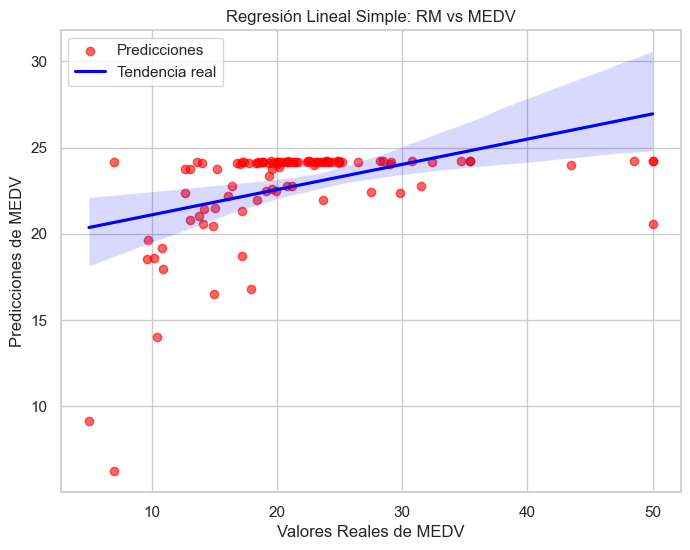

In [35]:
# 📈 Visualizar predicciones vs valores reales + línea de tendencia
plt.figure(figsize=(8, 6))

# Scatter de valores reales vs predicciones
plt.scatter(y_test, y_pred, label='Predicciones', color='red', alpha=0.6)

# Línea de tendencia real de las predicciones
sns.regplot(x=y_test, y=y_pred, scatter=False, color='blue', label='Tendencia real')

# Etiquetas y título correctos
plt.xlabel('Valores Reales de MEDV')
plt.ylabel('Predicciones de MEDV')
plt.title('Regresión Lineal Simple: RM vs MEDV')  # ✅ Estamos en RM vs MEDV, correcto
plt.legend()
plt.grid(True)
plt.show()


In [11]:
X_new = pd.DataFrame(np.array([[4], [8], [3.0]]),columns=["RM"]) # Ejemplo de nuevas características
# Realizar predicciones sobre los nuevos datos
y_pred_new = model.predict(X_new)

# Imprimir las predicciones
print("Predicciones sobre nuevos datos:")
print(y_pred_new)

Predicciones sobre nuevos datos:
[ 1.14688673 38.54009235 -8.20141468]


## 4. Modelo de Regresión Lineal usando CRIM

En esta sección se construirá un modelo de regresión lineal simple para predecir el valor medio de las viviendas (`MEDV`), utilizando como variable predictora  Crimen Per Capita (`CRIM`).

In [36]:
# Importar librerías necesarias para modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definimos la variable predictora y la variable objetivo
X = housing_df[['CRIM']]
y = housing_df['MEDV']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Regresión Lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de desempeño
ECM = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (ECM): {ECM:.2f}')
print(f'Coeficiente de Determinación (R²): {r2:.4f}')


Error Cuadrático Medio (ECM): 62.02
Coeficiente de Determinación (R²): 0.1542


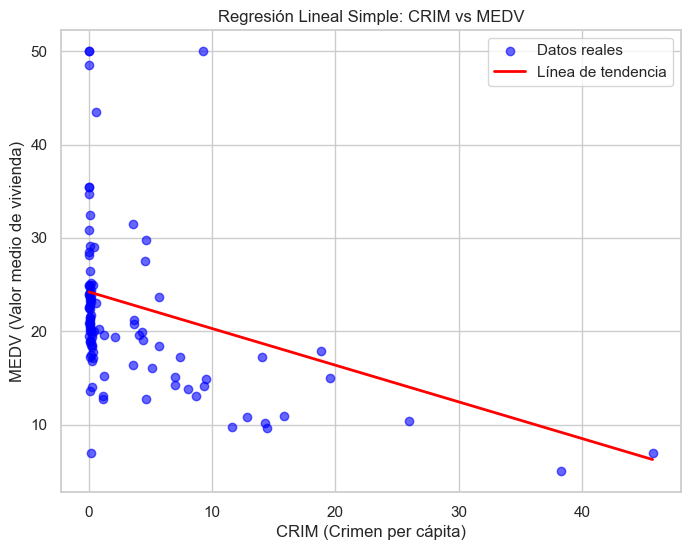

In [30]:
# 📈 Visualizar datos y línea de tendencia
plt.figure(figsize=(8, 6))

# Puntos de datos reales
plt.scatter(X_test, y_test, label='Datos reales', color='blue', alpha=0.6)

# Línea de tendencia aprendida
x_line = pd.DataFrame(np.linspace(X_test.min(), X_test.max(), 100), columns=['CRIM'])  # 🛠️ CORREGIDO
y_line = model.predict(x_line)  # Predecir usando un DataFrame

plt.plot(x_line, y_line, color='red', linewidth=2, label='Línea de tendencia')

# Etiquetas
plt.xlabel('CRIM (Crimen per cápita)')
plt.ylabel('MEDV (Valor medio de vivienda)')
plt.title('Regresión Lineal Simple: CRIM vs MEDV')
plt.legend()
plt.grid(True)
plt.show()


## Conclusiones Finales
- Se identificó una **relación negativa** entre `CRIM` y `MEDV`.
- A mayor nivel de crimen en el vecindario, menor es el valor promedio de las viviendas.
- Sin embargo, el modelo mostró un **bajo desempeño**:
  - **ECM** elevado (**62.02**).
  - **R²** bajo (**0.1542**), lo que indica que `CRIM` **explica solo el 15%** de la variabilidad en los precios.
- La dispersión de los datos alrededor de la línea de tendencia sugiere que el crimen por sí solo **no es suficiente** para explicar el valor de las propiedades.